In [1]:
 import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,roc_auc_score,roc_curve
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [3]:
data=pd.read_csv('C:\\Users\\lenovo\\Documents\\data science\\test_lAUu6dG.csv')
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [4]:
data.shape

(367, 12)

In [5]:
data.drop("Loan_ID",axis=1,inplace=True)

In [6]:
data.isnull().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [7]:
num_col=data.select_dtypes(include=['float64','int64']).columns
cat_col=data.select_dtypes(include='object').columns

In [8]:
data[num_col]=data[num_col].fillna(data[num_col].median())
data[cat_col]=data[cat_col].fillna(data[cat_col].mode().iloc[0])

In [9]:
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

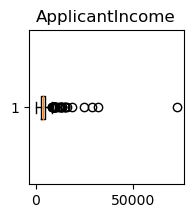

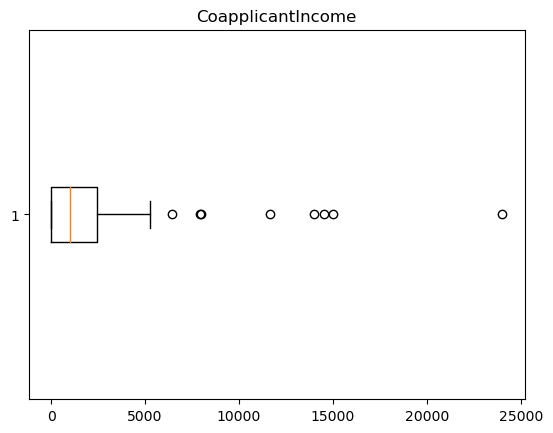

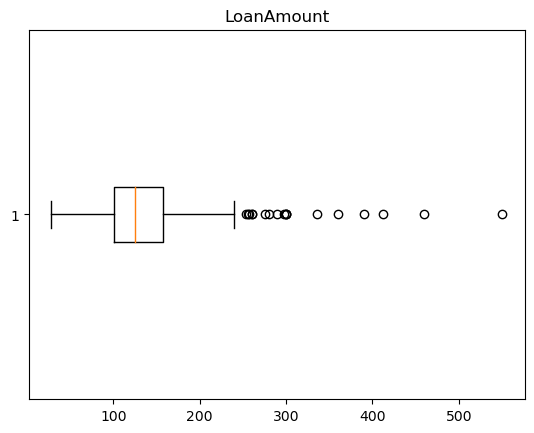

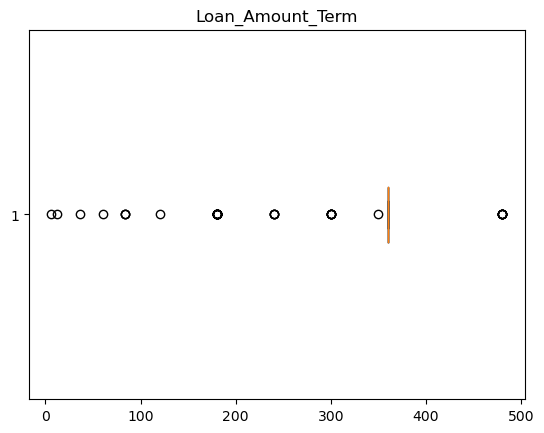

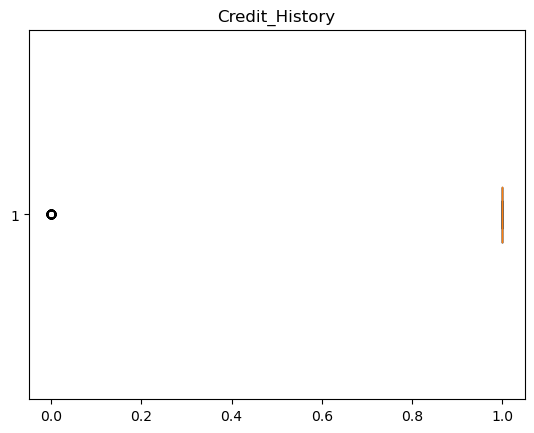

In [10]:
plt.figure(figsize=(2,2))
for column in num_col:
    plt.boxplot(data[column],vert=False)
    plt.title(column)
    plt.show()

In [11]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,367.000000,367.000000,367.000000
mean,4805.599455,1569.577657,135.980926,342.822888,0.839237
std,4910.685399,2334.232099,60.959739,64.658402,0.367814
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,101.000000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,157.500000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [12]:
q1=np.quantile(data['ApplicantIncome'],0.25)
q3=np.quantile(data['ApplicantIncome'],0.75)
IQR=q3-q1
ub1=q3+(1.5*IQR)
lb1=q1-(1.5*IQR)

In [13]:
con1=data['ApplicantIncome']<lb1
con2=data['ApplicantIncome']>ub1
con=data[con1|con2]

In [14]:
data['ApplicantIncome']=np.clip(data['ApplicantIncome'],lb1,ub1)

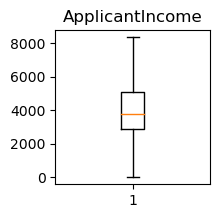

In [16]:
plt.figure(figsize=(2,2))
plt.boxplot(data['ApplicantIncome'])
plt.title('ApplicantIncome')
plt.show()

In [17]:
q1=np.quantile(data['CoapplicantIncome'],0.25)
q3=np.quantile(data['CoapplicantIncome'],0.75)
IQR=q3-q1
ub1=q3+(1.5*IQR)
lb1=q1-(1.5*IQR)

In [18]:
data['CoapplicantIncome']=np.clip(data['CoapplicantIncome'],lb1,ub1)

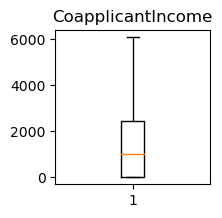

In [19]:
plt.figure(figsize=(2,2))
plt.boxplot(data['CoapplicantIncome'])
plt.title('CoapplicantIncome')
plt.show()

In [20]:
q1=np.quantile(data['LoanAmount'],0.25)
q3=np.quantile(data['LoanAmount'],0.75)
IQR=q3-q1
ub1=q3+(1.5*IQR)
lb1=q1-(1.5*IQR)

In [21]:
data['LoanAmount']=np.clip(data['LoanAmount'],lb1,ub1)

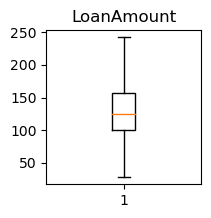

In [22]:
plt.figure(figsize=(2,2))
plt.boxplot(data['LoanAmount'])
plt.title('LoanAmount')
plt.show()

In [23]:
q1=np.quantile(data['Loan_Amount_Term'],0.25)
q3=np.quantile(data['Loan_Amount_Term'],0.75)
IQR=q3-q1
ub1=q3+(1.5*IQR)
lb1=q1-(1.5*IQR)

In [24]:
data['Loan_Amount_Term']=np.clip(data['Loan_Amount_Term'],lb1,ub1)

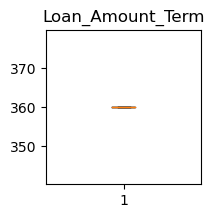

In [25]:
plt.figure(figsize=(2,2))
plt.boxplot(data['Loan_Amount_Term'])
plt.title('Loan_Amount_Term')
plt.show()

In [26]:
q1=np.quantile(data['Credit_History'],0.25)
q3=np.quantile(data['Credit_History'],0.75)
IQR=q3-q1
ub1=q3+(1.5*IQR)
lb1=q1-(1.5*IQR)

In [27]:
data['Credit_History']=np.clip(data['Credit_History'],lb1,ub1)

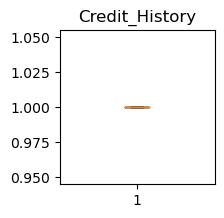

In [28]:
plt.figure(figsize=(2,2))
plt.boxplot(data['Credit_History'])
plt.title('Credit_History')
plt.show()

In [29]:
from sklearn.preprocessing import LabelEncoder

label_encoder=LabelEncoder()

for column in data.select_dtypes(include='object').columns:
    data[column]=label_encoder.fit_transform(data[column])

In [30]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,5720,0.0,110.0,360.0,1.0,2
1,1,1,1,0,0,3076,1500.0,126.0,360.0,1.0,2
2,1,1,2,0,0,5000,1800.0,208.0,360.0,1.0,2
3,1,1,2,0,0,2340,2546.0,100.0,360.0,1.0,2
4,1,0,0,1,0,3276,0.0,78.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
362,1,1,3,1,1,4009,1777.0,113.0,360.0,1.0,2
363,1,1,0,0,0,4158,709.0,115.0,360.0,1.0,2
364,1,0,0,0,0,3250,1993.0,126.0,360.0,1.0,1
365,1,1,0,0,0,5000,2393.0,158.0,360.0,1.0,0


In [31]:
import pickle

In [32]:
model_path='train_hyper_model.pkl'
savem=pickle.load(open(model_path,'rb'))

In [33]:
savem

RandomForestClassifier(criterion='entropy', max_depth=10, random_state=0)

In [34]:
output=savem.predict(data)

In [38]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,5720,0.0,110.0,360.0,1.0,2
1,1,1,1,0,0,3076,1500.0,126.0,360.0,1.0,2
2,1,1,2,0,0,5000,1800.0,208.0,360.0,1.0,2
3,1,1,2,0,0,2340,2546.0,100.0,360.0,1.0,2
4,1,0,0,1,0,3276,0.0,78.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
362,1,1,3,1,1,4009,1777.0,113.0,360.0,1.0,2
363,1,1,0,0,0,4158,709.0,115.0,360.0,1.0,2
364,1,0,0,0,0,3250,1993.0,126.0,360.0,1.0,1
365,1,1,0,0,0,5000,2393.0,158.0,360.0,1.0,0


In [45]:
data=pd.read_csv('C:\\Users\\lenovo\\Documents\\data science\\test_lAUu6dG.csv')
data['Loan_Status']=output


In [46]:
data['Loan_Status']=data['Loan_Status'].map({1:'Y',0:'N'})

In [48]:
data[['Loan_ID','Loan_Status']].to_csv('sub.csv')

In [49]:
import os
os.getcwd()

'C:\\Users\\lenovo'